In [3]:
import importlib
import os, pandas as pd, numpy as np
from joblib import dump, load
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
# from sod.core.evaluation import normalize
import sod.core.dataset as sod_core_dataset
importlib.reload(sod_core_dataset)
import sod.core.plot as sod_plot
importlib.reload(sod_plot)
# from sod.core.dataset import open_dataset # , normalize_df
# from sod import plot
isoutl = sod_core_dataset.is_outlier

dataframe = sod_core_dataset.open_dataset('allset_train.hdf', normalize=False, verbose=False)
print(sod_core_dataset.dfinfo(dataframe))

clf_iso_cont_5perc = load(os.path.abspath(os.path.join(os.getcwd(), '..', 'evaluations', 'results', 
                                                       'cv.globalset.iforest.yaml', 'models',
                         'IsolationForest?features=psd@2sec,psd@5sec&contamination=0.05&max_samples=512&n_estimators=100&behaviour=new.model')))
# print(str(clf50))
# print(str(clf_iso_cont_5perc))


# Copriamo tutti i casi: frequenze basse e frequenze medio alte (locali)
# psd0.2 psd5


ok (1408743 instances)
                         Min      Median           Max    #NAs  #<1Perc.  #>99Perc.
psd@0.05sec     -3076.526611 -121.284861    -18.616519  572816         0       8360
psd@0.1sec      -3076.526611 -123.730324    -18.540183       0     14088      14088
psd@0.2sec      -3076.526611 -125.493330    -18.394193       1     14087      14088
psd@0.5sec      -3076.526611 -127.553299    -17.799973       4     14088      14088
psd@1sec        -3076.526611 -124.911787    -17.364621      10     14088      14088
psd@2sec        -3076.526611 -121.630100    -14.675753      21     14088      14088
psd@3sec        -3076.526611 -121.212089     -7.249915      54     14087      14087
psd@5sec        -3076.526611 -123.018857      7.845090      56     14087      14087
psd@9sec        -3076.526611 -131.419926     19.164349   27289     13815      13815
amplitude_ratio     0.000000    0.001127     36.623112       0     14075      11850
magnitude           0.900000    4.400000      8.9000

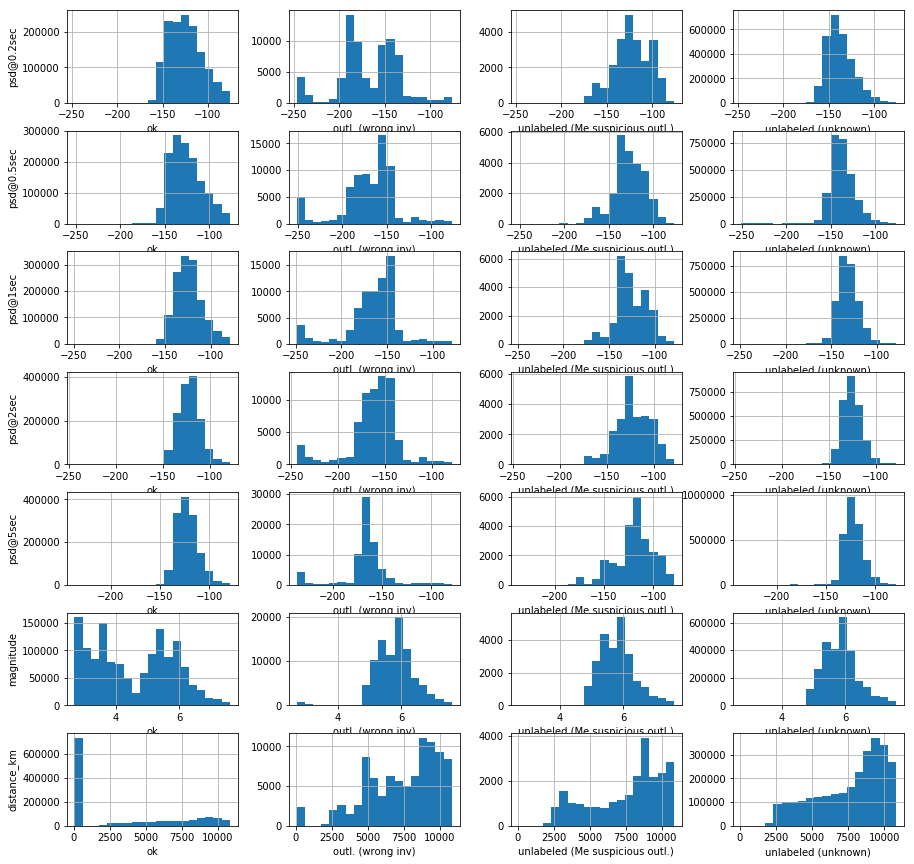

In [15]:
import importlib
import sod.core.plot as sod_plot
importlib.reload(sod_plot)

%matplotlib inline


fig = sod_plot.plotdist(dataframe,
                        ['psd@0.2sec', 'psd@0.5sec', 'psd@1sec', 'psd@2sec', 'psd@5sec', 'magnitude', 'distance_km'],
                        axis_lim=0.99)

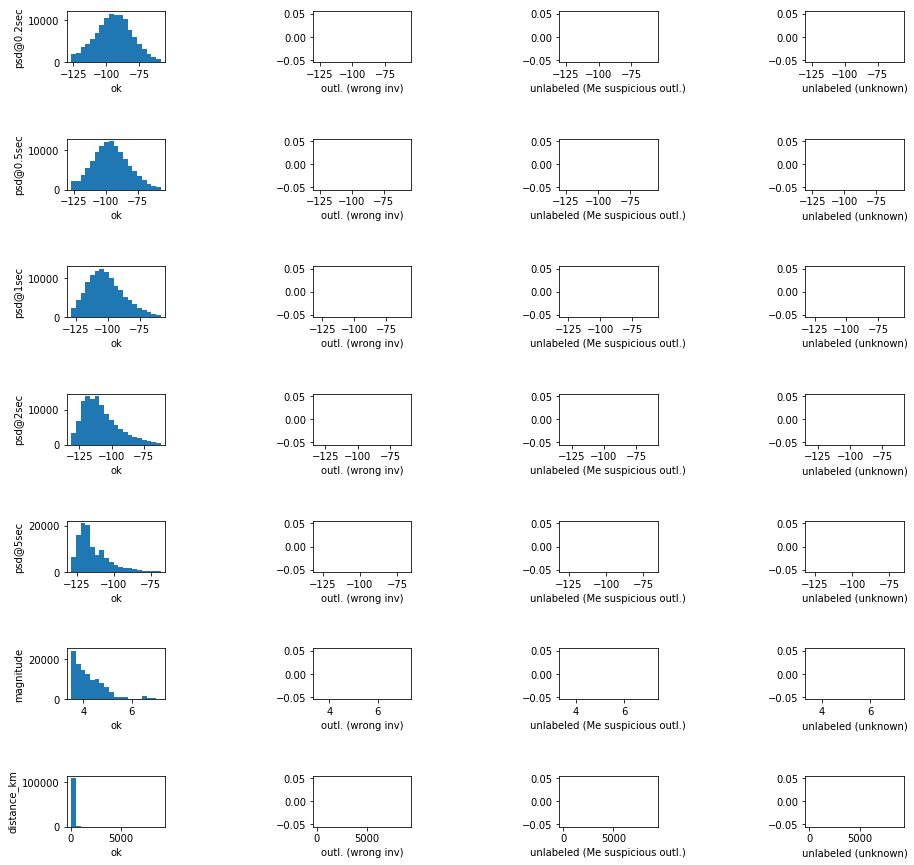

In [5]:
# we want to plot inliers and outliers only:
import sod.core.dataset as sod_core_dataset
importlib.reload(sod_core_dataset)
from sod.core import pdconcat
import importlib
import sod.core.plot as sod_plot
importlib.reload(sod_plot)

%matplotlib inline

columns = ['psd@0.2sec', 'psd@0.5sec', 'psd@1sec', 'psd@2sec', 'psd@5sec', 'magnitude', 'distance_km']

# dinfo = sod_core_dataset.dataset_info(dataframe)
dataframe2 = dataframe[dataframe.dataset_id==3]

# dataframe2 = dataframe2.rename({'globalset.id': 'id'}, axis=1)

fig = sod_plot.plotdist(
    dataframe2,
    ['psd@0.2sec', 'psd@0.5sec', 'psd@1sec', 'psd@2sec', 'psd@5sec', 'magnitude', 'distance_km'],
    axis_lim=0.99
)


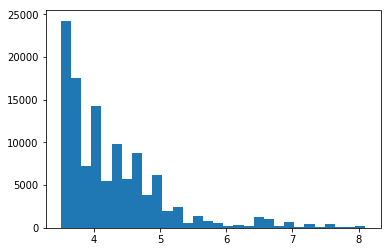

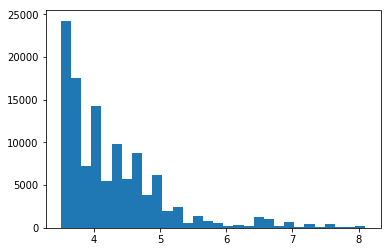

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
d=pd.read_hdf('/Users/riccardo/work/gfz/projects/sources/python/sod/sod/datasets/cx_chile.hdf')

plt.hist(d['magnitude'], 30)
plt.show()

plt.hist(dataframe2['magnitude'], 30)
plt.show()
